<a href="https://colab.research.google.com/github/anhhahuynh/Excercise-AI/blob/main/AI_W5_ControlDCMotor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 33.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=426db91c258be4b0be830b7b3a04bef5b550b41b1938cbcaa7af304935c1ead4
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

138.02214893169483


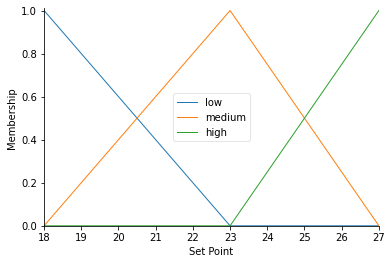

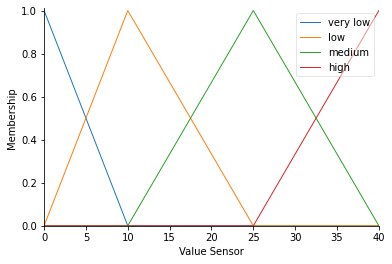

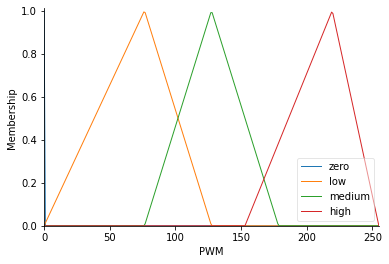

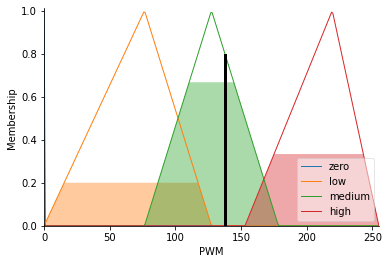

In [16]:
set_point = ctrl.Antecedent(np.arange(18, 28, 1), 'Set Point')
val_sensor = ctrl.Antecedent(np.arange(0, 41, 1), 'Value Sensor')
PWM = ctrl.Consequent(np.arange(0, 256, 1), 'PWM')

set_point['low']= fuzz.trimf(set_point.universe,[18,18,23])
set_point['medium']= fuzz.trimf(set_point.universe,[18,23,27])
set_point['high']= fuzz.trimf(set_point.universe,[23,27,27])

val_sensor['very low'] = fuzz.trimf(val_sensor.universe,[0,0,10])
val_sensor['low'] = fuzz.trimf(val_sensor.universe,[0,10,25])
val_sensor['medium'] = fuzz.trimf(val_sensor.universe,[10,25,40])
val_sensor['high'] = fuzz.trimf(val_sensor.universe,[25,40,40])

PWM['zero'] = fuzz.trimf(PWM.universe, [0, 0, 0])
PWM['low'] = fuzz.trimf(PWM.universe, [0, 76.5, 127.5])
PWM['medium'] = fuzz.trimf(PWM.universe, [76.5, 127.5, 178.5])
PWM['high'] = fuzz.trimf(PWM.universe, [153, 219.5, 255])

set_point.view()
val_sensor.view()
PWM.view()

rule1 = ctrl.Rule(val_sensor['very low'] & set_point['low'],PWM['zero'])
rule2 = ctrl.Rule(val_sensor['low']      & set_point['low'],PWM['low'])
rule3 = ctrl.Rule(val_sensor['medium']   & set_point['low'],PWM['medium'])
rule4 = ctrl.Rule(val_sensor['high']     & set_point['low'],PWM['high'])

rule5 = ctrl.Rule(val_sensor['very low'] & set_point['medium'],PWM['zero'])
rule6 = ctrl.Rule(val_sensor['low']      & set_point['medium'],PWM['low'])
rule7 = ctrl.Rule(val_sensor['medium']   & set_point['medium'],PWM['low'])
rule8 = ctrl.Rule(val_sensor['high']     & set_point['medium'],PWM['low'])

rule9 = ctrl.Rule(val_sensor['very low'] & set_point['high'],PWM['high'])
rule10 = ctrl.Rule(val_sensor['low']      & set_point['high'],PWM['high'])
rule11 = ctrl.Rule(val_sensor['medium']   & set_point['high'],PWM['medium'])
rule12 = ctrl.Rule(val_sensor['high']     & set_point['high'],PWM['zero'])

PWMing_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12])
PWMing= ctrl.ControlSystemSimulation(PWMing_ctrl)
PWMing.input['Set Point']=19
PWMing.input['Value Sensor']=30
PWMing.compute()
print(PWMing.output['PWM'])
PWM.view(sim=PWMing)




